In [1]:
import numpy as np
import pandas as pd
from utils import build_delhi_df, build_chennai_df, build_AQI_time_graph, build_DiD_graph

In [2]:
delhi_df = build_delhi_df(["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

In [3]:
chennai_df = build_chennai_df(["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

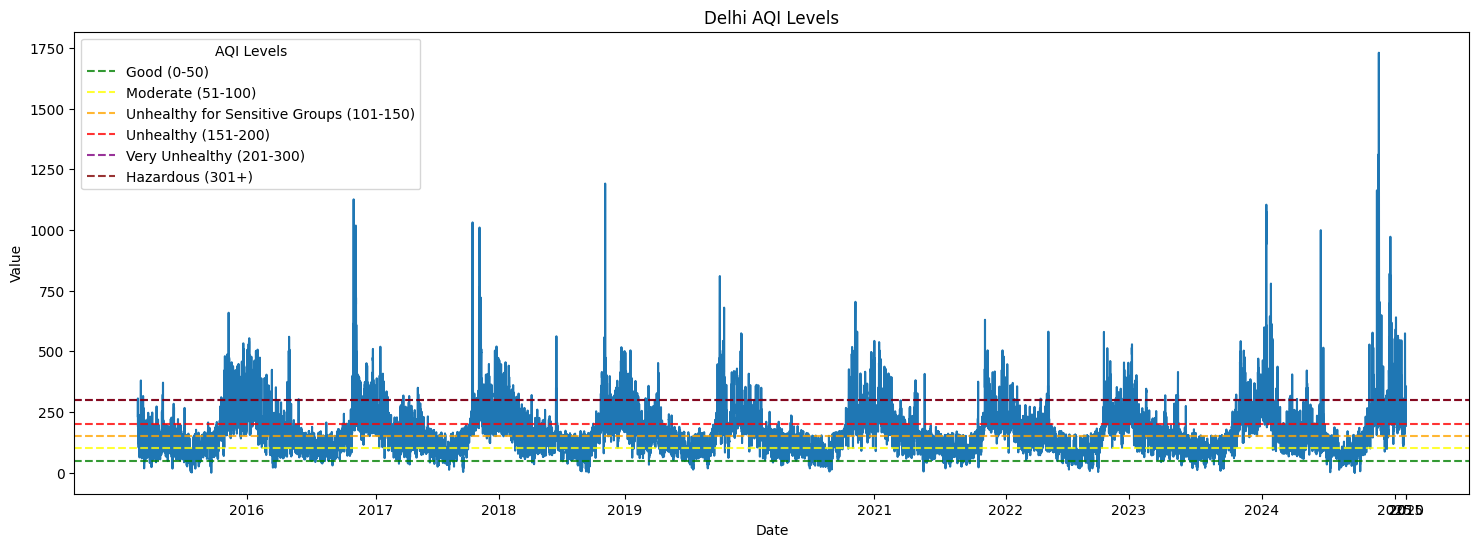

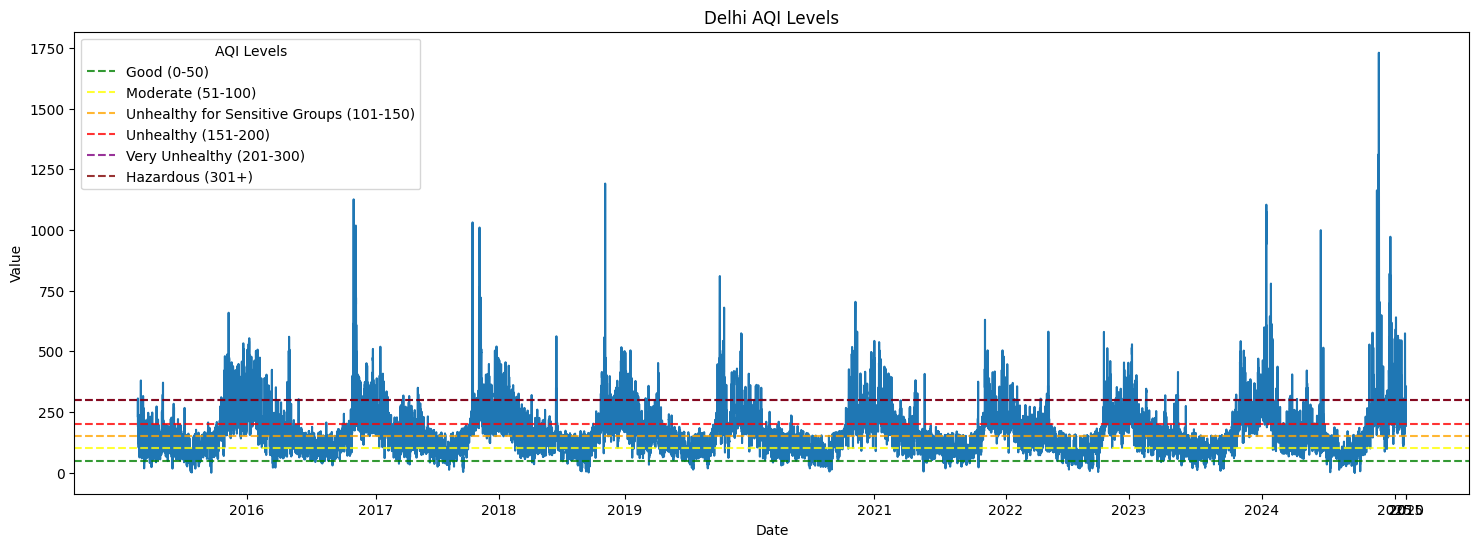

In [4]:
build_AQI_time_graph(delhi_df, "Delhi AQI Levels")

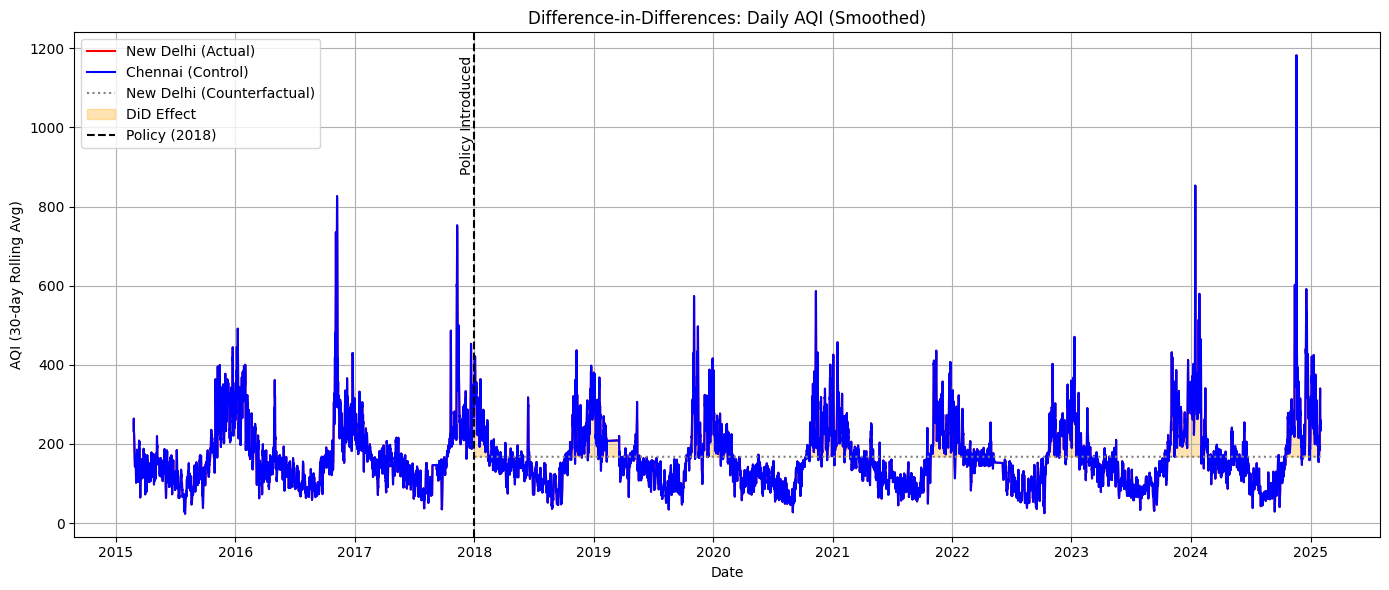

In [5]:
delhi_did_model = build_DiD_graph(delhi_df, chennai_df)
delhi_did_model